# **Import Libraries & Upload Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SEMESTER_7/DATMIN/dataset/Data_Tanaman_Padi_Sumatera_version_1.csv")
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
df.isnull().sum()

,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


# **EDA**

In [ ]:
df['Provinsi'].value_counts()

,count
Provinsi,
Aceh,28
Sumatera Utara,28
Sumatera Barat,28
Riau,28
Jambi,28
Sumatera Selatan,28
Bengkulu,28
Lampung,28


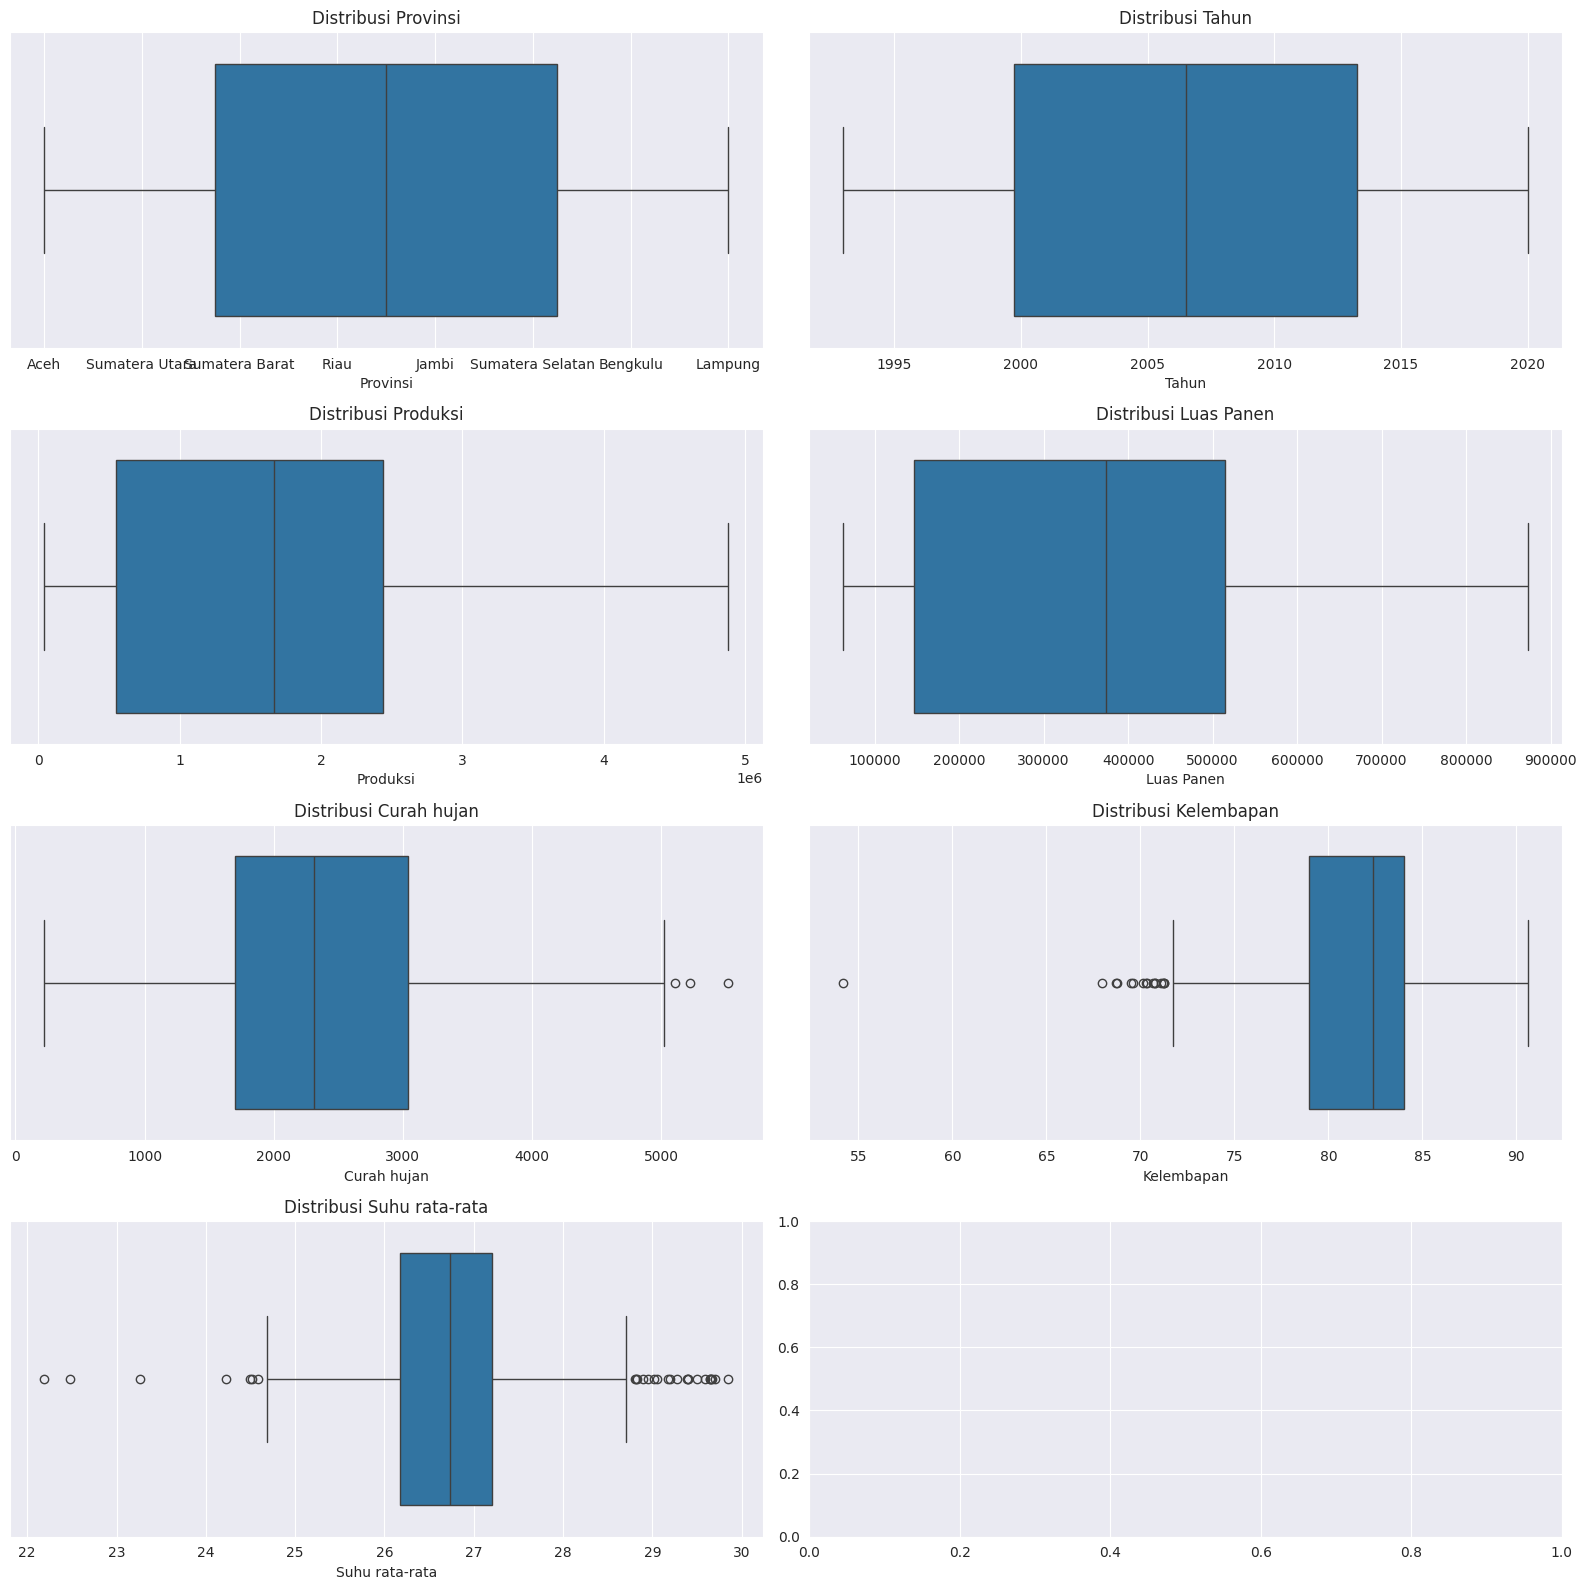

In [ ]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')

for ax, feature in zip(axes.flatten(), df.columns):
    sns.boxplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Menghapus kolom data Tahun
df = df.drop(columns='Tahun', axis=1)
df.sample(5)

,Provinsi,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
85,Riau,445361.00,146177.00,1991.3,84.90,26.10
33,Sumatera Utara,3321049.00,823749.00,2496.9,83.53,27.16
193,Bengkulu,288810.52,65891.16,3649.9,83.79,26.64
121,Jambi,561007.00,165729.00,2044.5,70.77,28.82
189,Bengkulu,593194.00,147572.00,3323.0,83.70,26.90


In [ ]:
# Melakukan Label Encoding pada kolom data Provinsi
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['Provinsi'] = le.fit_transform(df['Provinsi'])
df.sample(5)

,Provinsi,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
27,0,1861567.1,317869.41,1619.2,80.82,25.41
48,7,3727249.0,742968.00,2627.0,78.67,28.80
215,3,3101455.0,641876.00,1685.0,79.20,26.80
31,7,3136760.0,790051.00,2326.5,81.31,26.33
149,6,1899849.0,561724.00,2368.2,70.36,28.23


# **Modelling**

In [ ]:
# Hapus data kolom produksi dari data fitur menjadi data target
X = df.drop('Produksi', axis=1)
# Tetapkan kolom Produksi menjadi variabel dependen atau target
y = df[['Produksi']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data Training : ', X_train.shape, y_train.shape)
print('Data Testing : ', X_test.shape, y_test.shape)

Data Training :  (179, 5) (179, 1)
Data Testing :  (45, 5) (45, 1)


In [ ]:
# Melakukan transformasi data dengan menggunakan StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models ={
  'LinearRegression': LinearRegression(),
  'DecisionTree': DecisionTreeRegressor(),
  'RandomForest' : RandomForestRegressor(random_state=42),
}

In [ ]:
calcs= {
  'Models':['LinearRegression','DecisionTree','RandomForest'],
  'MAE':[],
  'MSE':[],
  'RMSE':[],
  'R2':[]
}

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred=[]
k=0
for n in models :
    models[n].fit(X_train_scaled,y_train_scaled)
    y_pred.append(models[n].predict(X_test_scaled))

    calcs['MAE'].append(mean_absolute_error(y_test_scaled, y_pred[k]))
    calcs['MSE'].append(mean_squared_error(y_test_scaled, y_pred[k]))
    calcs['RMSE'].append(math.sqrt(mean_squared_error(y_test_scaled, y_pred[k])))
    calcs['R2'].append(r2_score(y_test_scaled, y_pred[k]))

    k += 1
calcs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'Models': ['LinearRegression', 'DecisionTree', 'RandomForest'],
 'MAE': [0.24854484693173412, 0.2677795696460681, 0.21117404965602274],
 'MSE': [0.12010972535627684, 0.18653584888994715, 0.08513260738984449],
 'RMSE': [0.3465685002366442, 0.4318979612014245, 0.29177492591010024],
 'R2': [0.8798902746437232, 0.8134641511100528, 0.9148673926101555]}

In [ ]:
results = pd.DataFrame(calcs)
results.sort_values(by='R2',ascending=False).style.background_gradient(cmap='YlGn')

,Models,MAE,MSE,RMSE,R2
2,RandomForest,0.211174,0.085133,0.291775,0.914867
0,LinearRegression,0.248545,0.120110,0.346569,0.879890
1,DecisionTree,0.267780,0.186536,0.431898,0.813464


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


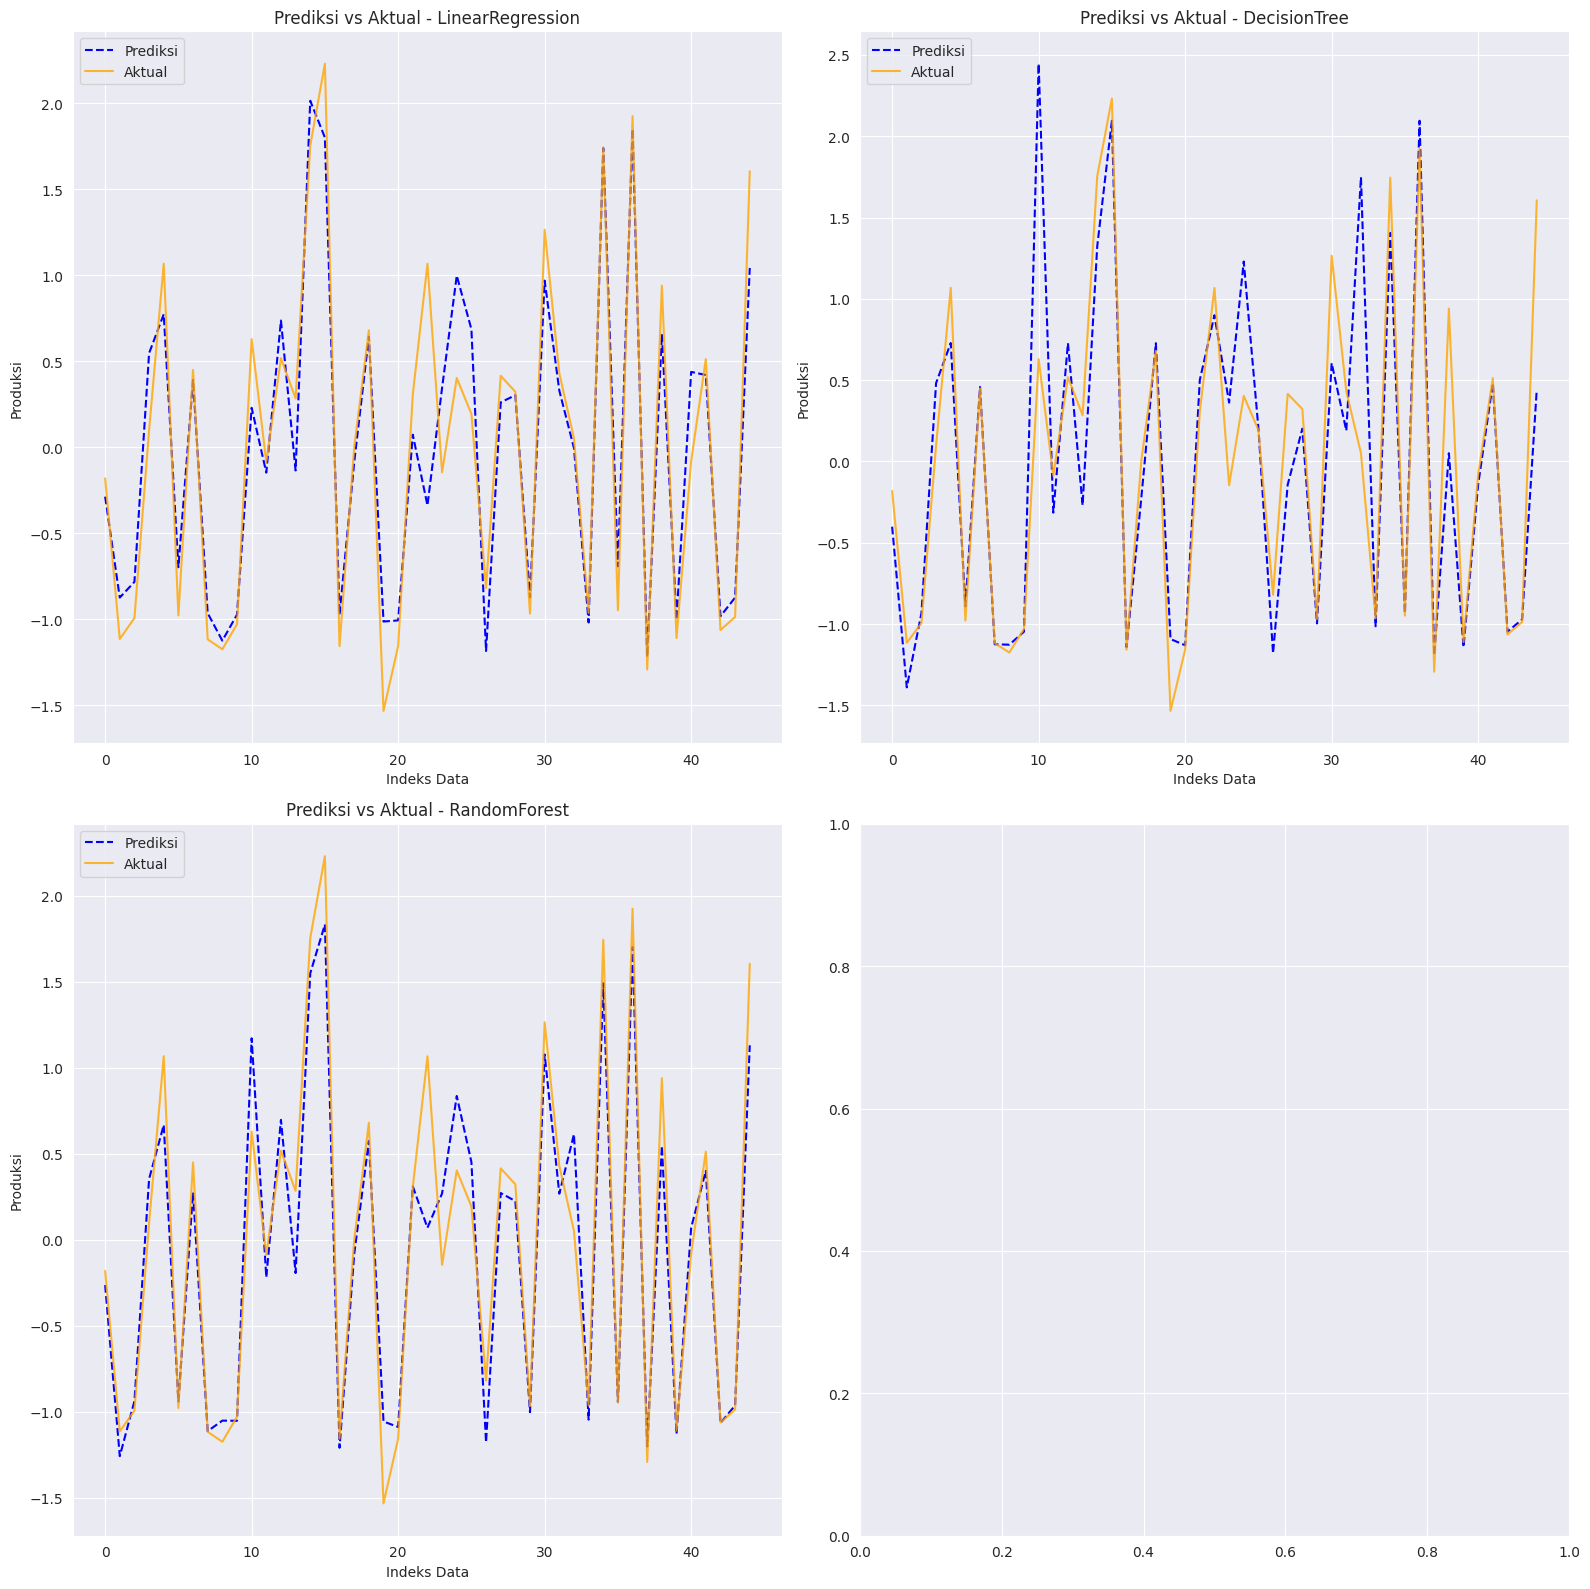

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
sns.set_style('darkgrid')

for ax, (model_name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train_scaled, y_train_scaled)

    y_pred = model.predict(X_test_scaled)

    ax.plot(y_pred, label='Prediksi', color='blue', linestyle='--')
    ax.plot(y_test_scaled, label='Aktual', color='orange', alpha=0.8)

    ax.set_title(f'Prediksi vs Aktual - {model_name}')
    ax.set_xlabel("Indeks Data")
    ax.set_ylabel("Produksi")
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()

Feature Importance for LinearRegression:
          Feature    Importance
4  Suhu rata-rata  66720.152205
3      Kelembapan   6206.425946
0        Provinsi    176.314380
2     Curah hujan     32.349884
1      Luas Panen      4.565113

--------------------------------------------------

Feature Importance for DecisionTree:
          Feature  Importance
1      Luas Panen    0.914018
0        Provinsi    0.039316
4  Suhu rata-rata    0.035358
3      Kelembapan    0.006795
2     Curah hujan    0.004514

--------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importance for RandomForest:
          Feature  Importance
1      Luas Panen    0.905379
0        Provinsi    0.038295
2     Curah hujan    0.021385
4  Suhu rata-rata    0.019085
3      Kelembapan    0.015855

--------------------------------------------------



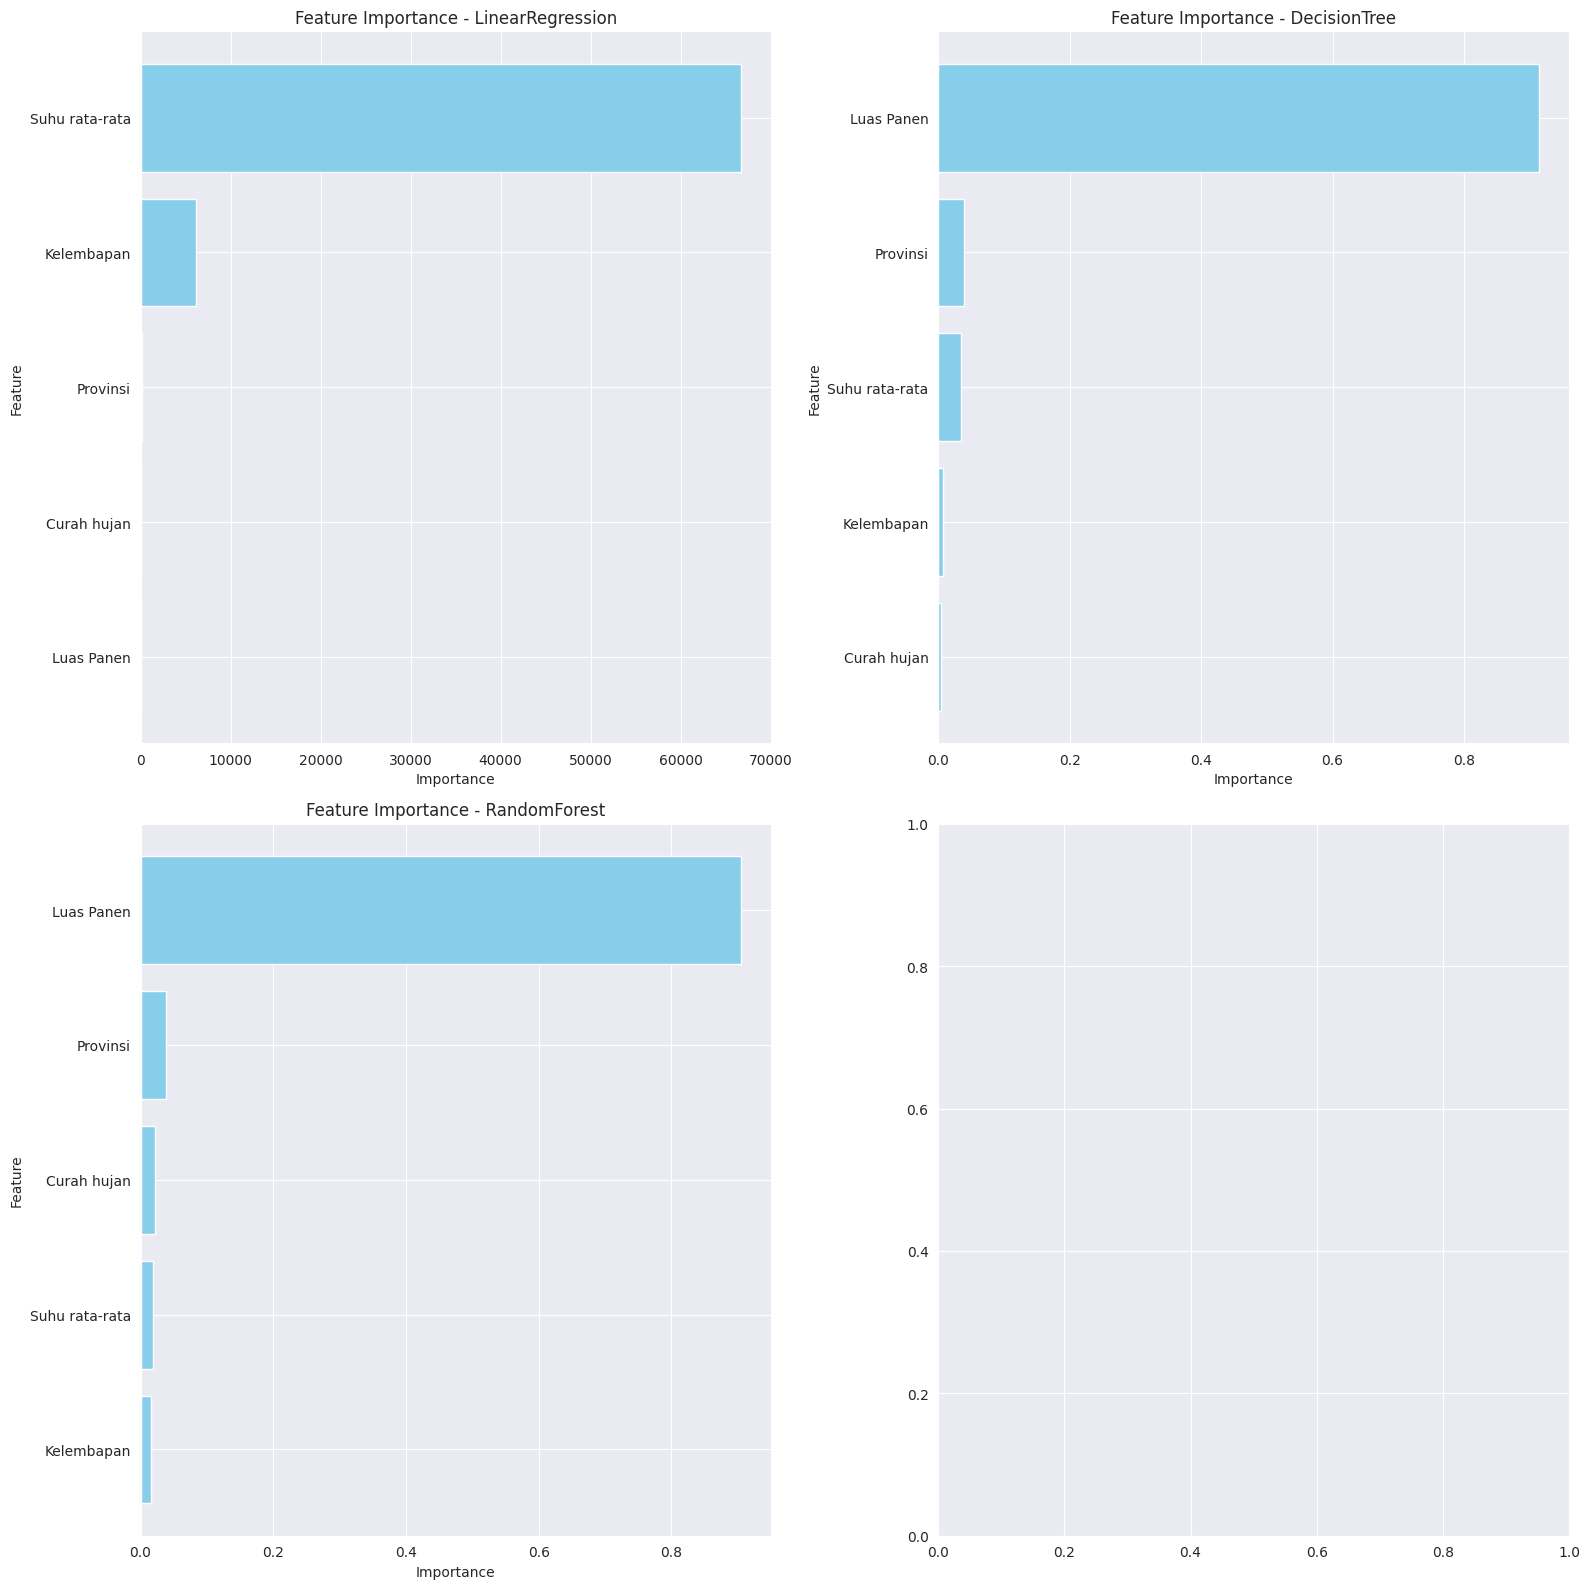

In [ ]:
feature_names = X.columns if hasattr(X, "columns") else [f"Feature {i}" for i in range(X.shape[1])]

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

# Iterasi untuk setiap model
for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X, y)

    if hasattr(model, "coef_"):
        importance = np.abs(model.coef_.flatten()) if model.coef_.ndim > 1 else np.abs(model.coef_)
    elif hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:
        print(f"Model {model_name} tidak mendukung penghitungan feature importance.")
        continue

    if len(feature_names) != len(importance):
        print(f"Model {model_name} memiliki ketidaksesuaian panjang fitur ({len(feature_names)}) dan importance ({len(importance)}).")
        continue

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    print(f"Feature Importance for {model_name}:")
    print(importance_df)
    print("\n" + "-"*50 + "\n")

    axes[idx].barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
    axes[idx].set_xlabel("Importance")
    axes[idx].set_ylabel("Feature")
    axes[idx].set_title(f"Feature Importance - {model_name}")
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()